<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.1.1
# *Evaluating Classification Models*

In this lab you will be practicing evaluating classification models (Logistic Regression in particular) on a "Breast Cancer" data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

%matplotlib inline

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

    a) radius (mean of distances from center to points on the perimeter) 
    b) texture (standard deviation of gray-scale values) 
    c) perimeter 
    d) area 
    e) smoothness (local variation in radius lengths) 
    f) compactness (perimeter^2 / area - 1.0) 
    g) concavity (severity of concave portions of the contour) 
    h) concave points (number of concave portions of the contour) 
    i) symmetry 
    j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [2]:
breast_cancer_csv = 'breast-cancer-wisconsin-data.csv'
breast_cancer = pd.read_csv(breast_cancer_csv)
breast_cancer.head()



,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### 2. EDA 

i. Explore dataset

ii. Check for nulls

In [3]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
breast_cancer.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
breast_cancer['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [6]:
# this will replace "M" with 1.
breast_cancer['diagnosis'].replace(to_replace ="M",
                 value =1, inplace=True)

In [7]:
# this will replace "B" with 0.
breast_cancer['diagnosis'].replace(to_replace ="B",
                 value =0, inplace=True)

In [8]:
#check
breast_cancer.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
412,905539,0,9.397,21.68,59.75,268.8,0.07969,0.06053,0.03735,0.005128,...,27.99,66.61,301.0,0.1086,0.1887,0.18680,0.02564,0.2376,0.09206,NaN
552,924084,0,12.770,29.43,81.35,507.9,0.08276,0.04234,0.01997,0.014990,...,36.00,88.10,594.7,0.1234,0.1064,0.08653,0.06498,0.2407,0.06484,NaN
235,88249602,0,14.030,21.25,89.79,603.4,0.09070,0.06945,0.01462,0.018960,...,30.28,98.27,715.5,0.1287,0.1513,0.06231,0.07963,0.2226,0.07617,NaN
439,909410,0,14.020,15.66,89.59,606.5,0.07966,0.05581,0.02087,0.026520,...,19.31,96.53,688.9,0.1034,0.1017,0.06260,0.08216,0.2136,0.06710,NaN
220,8812816,0,13.650,13.16,87.88,568.9,0.09646,0.08711,0.03888,0.025630,...,16.35,99.71,706.2,0.1311,0.2474,0.17590,0.08056,0.2380,0.08718,NaN
326,89524,0,14.110,12.88,90.03,616.5,0.09309,0.05306,0.01765,0.027330,...,18.00,98.40,749.9,0.1281,0.1109,0.05307,0.05890,0.2100,0.07083,NaN
345,898677,0,10.260,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.020370,...,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488,NaN
359,901034301,0,9.436,18.32,59.82,278.6,0.10090,0.05956,0.02710,0.014060,...,25.02,75.79,439.6,0.1333,0.1049,0.11440,0.05052,0.2454,0.08136,NaN
244,884180,1,19.400,23.50,129.10,1155.0,0.10270,0.15580,0.20490,0.088860,...,30.53,144.90,1417.0,0.1463,0.2968,0.34580,0.15640,0.2920,0.07614,NaN
269,8910720,0,10.710,20.39,69.50,344.9,0.10820,0.12890,0.08448,0.028670,...,25.21,76.51,410.4,0.1335,0.2550,0.25340,0.08600,0.2605,0.08701,NaN


In [9]:
breast_cancer['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [10]:
breast_cancer_features = breast_cancer.drop(breast_cancer[['id','diagnosis','Unnamed: 32']], axis=1)
breast_cancer_features.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
feat_list = list(breast_cancer_features.columns)
feat_list

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

### 3. Logistic Regression Model

#### 3.1 Use Logistic Regression

Use Logistic Regression and examine accuracy score, confusion matrix, classification report (see sklearn classification_report) for that model.

#### 3.2 Calculate the predicted labels (class) and predicted probabilities on the test dataset.

In [12]:
# predicted labels (class):

X = breast_cancer_features
y= breast_cancer['diagnosis']

# Create Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

LogReg = LogisticRegression()
reg = LogReg.fit(X_train, y_train)

feature_cols = feat_list

for col in zip(X_train.columns, reg.coef_[0]):
    print('{:<10s}  {:+.06f}'.format(col[0], col[1])) 



#training data acc score
y_pred = LogReg.predict(X_train)

print('accuracy_score for the training data:', accuracy_score(y_train,y_pred))

#training data acc score
y_predtest = LogReg.predict(X_test)

print('accuracy_score for the test data:', accuracy_score(y_test,y_predtest))



radius_mean  -1.079417
texture_mean  -0.425641
perimeter_mean  -0.119561
area_mean   +0.008759
smoothness_mean  +0.034934
compactness_mean  +0.188768
concavity_mean  +0.270982
concave points_mean  +0.110803
symmetry_mean  +0.052792
fractal_dimension_mean  +0.008911
radius_se   -0.064601
texture_se  -0.247202
perimeter_se  -0.224883
area_se     +0.077860
smoothness_se  +0.004102
compactness_se  +0.043630
concavity_se  +0.065467
concave points_se  +0.016349
symmetry_se  +0.016572
fractal_dimension_se  +0.003983
radius_worst  -1.245965
texture_worst  +0.426923
perimeter_worst  +0.200698
area_worst  +0.017673
smoothness_worst  +0.060041
compactness_worst  +0.549623
concavity_worst  +0.719876
concave points_worst  +0.212029
symmetry_worst  +0.149914
fractal_dimension_worst  +0.044240
accuracy_score for the training data: 0.9472527472527472
accuracy_score for the test data: 0.9473684210526315


C:\Users\imran\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


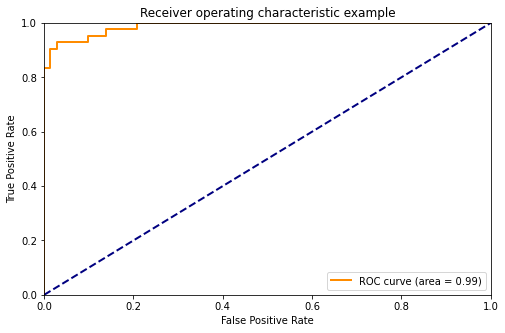

In [13]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# predicted probabilities:

#Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = LogReg.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(8,5))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

#### 3.3 Create the confusion matrix for your classfier's performance on the test set.

i. Create confusion_matrix

ii. Convert confusion_matrix to a dataframe

    index=['is_cancer', 'is_healthy']
    columns=['predicted_cancer','predicted_healthy']

In [14]:
print(np.asarray([['TN', 'FP'], ['FN', 'TP']]))

[['TN' 'FP']
 ['FN' 'TP']]


In [15]:
# ANSWER

from sklearn.metrics import confusion_matrix

y_pred_class = LogReg.predict(X_test)

print(confusion_matrix(y_test, y_pred_class))

[[70  2]
 [ 4 38]]


In [16]:
index=['is_cancer', 'is_healthy']
columns=['predicted_cancer','predicted_healthy']

m1 = confusion_matrix(y_test, y_pred_class)

matrix1 = np.rot90(m1, 2)

matrix1 = pd.DataFrame(matrix1)

matrix1.index = index
matrix1.columns = columns

matrix1


,predicted_cancer,predicted_healthy
is_cancer,38,4
is_healthy,2,70


#### 3.4 Calculate Accuracy

**Classification Accuracy:** Overall, how often is the classifier correct?
    
    (TP + TN) / float(TP + TN + FP + FN)

In [17]:
# ANSWER


In [18]:
# (TP + TN) / float(TP + TN + FP + FN)

acc = (matrix1.loc['is_cancer','predicted_cancer'] + matrix1.loc['is_healthy','predicted_healthy']) / np.sum(matrix1.values)

print('Accuracy:', acc)

Accuracy: 0.9473684210526315


#### 3.5 Calculate Classification Error

**Classification Error:** Overall, how often is the classifier incorrect?

Also known as "Misclassification Rate"

    (FP + FN) / float(TP + TN + FP + FN)

In [19]:
# (FP + FN) / float(TP + TN + FP + FN)

Class_error = (matrix1.loc['is_healthy','predicted_cancer'] + matrix1.loc['is_cancer','predicted_healthy']) / np.sum(matrix1.values)

print('Classification Error:', Class_error)

Classification Error: 0.05263157894736842


#### 3.6 Calculate Sensitivity

**Sensitivity:** When the actual value is positive, how often is the prediction correct?

Something we want to maximize
How "sensitive" is the classifier to detecting positive instances?
- Also known as "True Positive Rate" or "Recall"
- TP / all positive
    - all positive = TP + FN
    
    sensitivity = TP / float(FN + TP)

In [20]:
# ANSWER

TPR = matrix1.loc['is_cancer','predicted_cancer'] / (matrix1.loc['is_cancer','predicted_cancer'] + matrix1.loc['is_cancer','predicted_healthy'])

print('Sensitivity:', TPR)

Sensitivity: 0.9047619047619048


#### 3.7 Calculate Specificity

**Specificity:** When the actual value is negative, how often is the prediction correct?

- Something we want to maximize. How "specific" (or "selective") is the classifier in predicting positive instances?
- TN / all negative
    - all negative = TN + FP
    
    specificity = TN / (TN + FP)

In [21]:
# ANSWER

spec = matrix1.loc['is_healthy','predicted_healthy'] / (matrix1.loc['is_healthy','predicted_cancer'] + matrix1.loc['is_healthy','predicted_healthy'])

print('Specificity:', spec)

Specificity: 0.9722222222222222


#### 3.8 Calculate False Positive Rate

**False Positive Rate:** When the actual value is negative, how often is the prediction incorrect?

    false_positive_rate = FP / float(TN + FP)

In [22]:
# ANSWER

FPR = matrix1.loc['is_healthy','predicted_cancer'] / (matrix1.loc['is_healthy','predicted_cancer'] + matrix1.loc['is_healthy','predicted_healthy'])

print('False Positive Rate:', FPR)

False Positive Rate: 0.027777777777777776


#### 3.9 Calculate Precision

**Precision:** When a positive value is predicted, how often is the prediction correct?

How "precise" is the classifier when predicting positive instances?

    precision = TP / float(TP + FP)

In [23]:
# ANSWER

FPR = matrix1.loc['is_healthy','predicted_cancer'] / (matrix1.loc['is_healthy','predicted_cancer'] + matrix1.loc['is_healthy','predicted_healthy'])

print('Specificity:', FPR)

Specificity: 0.027777777777777776


#### 3.10 Create a dataframe of the predicted test dataset probabilities with column name 'class_0_pp','class_1_pp'

In [24]:
# ANSWER
# Explicitly name the columns as specified
Y_pp = pd.DataFrame(LogReg.predict_proba(X_test), columns=['class_B_pp','class_M_pp'])
Y_pp.head(10)

,class_B_pp,class_M_pp
0,0.625558,0.374442
1,0.374581,0.625419
2,0.996227,0.003773
3,0.001042,0.998958
4,0.265530,0.734470
5,0.001342,0.998658
6,0.000013,0.999987
7,0.011106,0.988894
8,0.981731,0.018269
9,0.986625,0.013375


#### 3.11 Create a classification report

In [25]:
# ANSWER
from sklearn.metrics import classification_report

target_names = ['class_0_pp', 'class_1_pp']
print(classification_report(y_test,y_predtest,target_names=target_names))


              precision    recall  f1-score   support

  class_0_pp       0.95      0.97      0.96        72
  class_1_pp       0.95      0.90      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



#### 3.12 The Receiver operating characteristic (ROC) curve

Plot the ROC curve for Class 1

In [26]:
from sklearn.metrics import roc_curve, auc

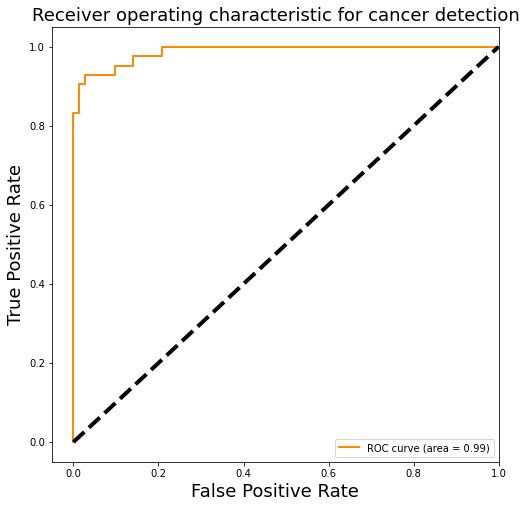

In [27]:
# For class 1, find the area under the curve
# Find fpr, tpr

#Generate the prediction values for each of the test observations using predict_proba() function rather than just predict
preds = LogReg.predict_proba(X_test)[:,1]

# Store the false positive rate(fpr), true positive rate (tpr) in vectors for use in the graph
fpr, tpr, _ = roc_curve(y_test, preds)

# Find auc
# Store the Area Under the Curve (AUC) so we can annotate our graph with theis metric
roc_auc = auc(fpr, tpr)


# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[8,8])

# Plot fpr, tpr

lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for cancer detection', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [28]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score


lasso = linear_model.Lasso()
print(cross_val_score(lasso, X_test, y_test, cv=5))

[0.5414329  0.05523999 0.39545699 0.4042002  0.43404197]


**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Validation curves: plotting scores to evaluate models](https://scikit-learn.org/stable/modules/learning_curve.html#learning-curves)



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



